# Описание проекта
Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Цель исследования:**

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Ход исследования:**
1. Приоритизация гипотез
    * Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    * Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    * Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
2. Анализ А/В теста

**Описание данных:**

Данные для приоритизации гипотез: 

Файл `/datasets/hypothesis.csv`
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для анализа:

Файл `/datasets/orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("max_colwidth", 1000)

## Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [2]:
# Прочитаем данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
# Изменим название столбцов
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Применим ICE и отсортируем
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
# Применим RICE и отсортируем
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Как изменилась приоритизация гипотез при применении RICE вместо ICE

In [5]:
pd.set_option("max_colwidth", 1000)
priority_of_hypothesis = hypothesis_ICE.merge(hypothesis_RICE, on='hypothesis')
priority_of_hypothesis.sort_values('RICE', ascending=False)

,hypothesis,ICE,RICE
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


In [6]:
pd.reset_option("max_colwidth")

По фреймворку ICE наибольшую оценку имели гпиотезы 8,0 и 7. После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. Это объясняется тем, что в случае фреймворка ICE в отличие от RICE мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез.

В нашем случае наиболее приоритетными гипотезами будут 2, 4, 1.

## Анализ А/В теста

### Подготовка данных к анализу

После проведения A/B теста получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`

Выгрузим их, проверим и обработаем данные, при необходимости

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
#Функция для получения первичных данных
def get_data(df):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    print('Общая информация')
    display(df.info())
    print('Первые строки')
    display(df.head())
    print('Дубликатов :', df.duplicated().sum())

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
get_data(orders)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

Первые строки


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Дубликатов : 0


Все в порядке, немного поменяли название столбцов и изменили тип данных

In [9]:
visitors['date'] = pd.to_datetime(visitors['date'])
get_data(visitors)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Первые строки


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Дубликатов : 0


Все в порядке, немного поменяли название столбцов и изменили тип данных

###  График кумулятивной выручки по группам

Соберем кумулятивные данные

In [10]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

#кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionid':'nunique', 'visitorid':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
#кумулятивные показатели из visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)
#объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики

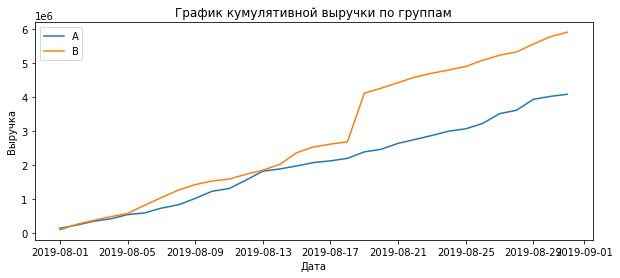

In [11]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Выручка увеличивается со временем, группа В показывает лучшие результаты. Также видим резкий всплеск в группе В, это связано с большим числом заказов, либо появлении более дорогих товаров. Дальше разберемся с этим

### График кумулятивного среднего чека по группам

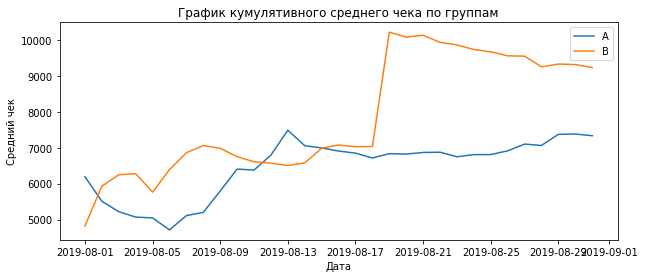

In [12]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Средний чек в группе В почти всегда был выше, но резкий рост среднего чека заставляет задуматься, возможно в эту группу попали аномально крупные заказы.

### График относительного изменения кумулятивного среднего чека группы B к группе A

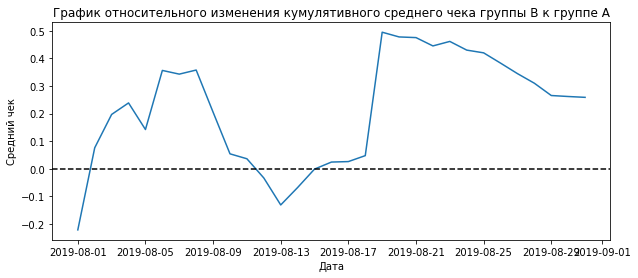

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График очень резко скачет, где-то однозначно крупные заказы и выбросы

### График кумулятивной конверсии по группам

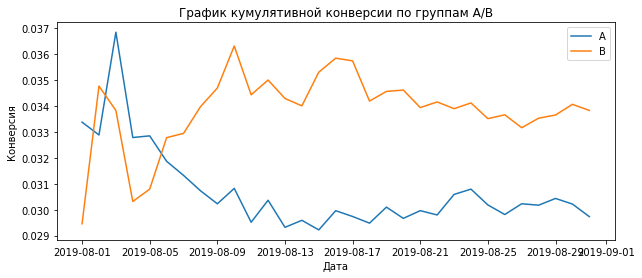

In [14]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()
 

* Группа В показывает стабильно высокую конверсия
* Группа А проседает

### График относительного изменения кумулятивной конверсии группы B к группе A

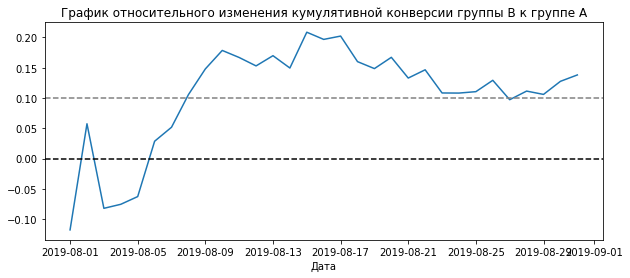

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeConversions['date'], ((mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'])-1))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

По прошествию недели, конверсия группы Б стабильно выше группы А. Под конец недели она понемногу падала, но сейчас направлена вверх

### Точечный график количества заказов по пользователям

In [16]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


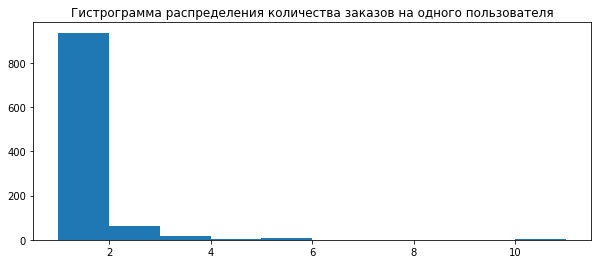

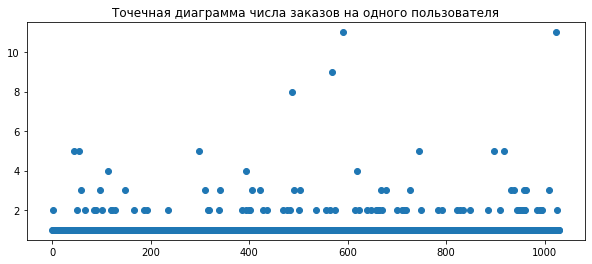

In [17]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'orders']
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')


x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

Подавляющее число клиентов не совершают больше 2 заказов. Т.к точная доля, тех что больше 2 заказов неизвестна, нельзя точно их назвать аномалиями. Посчитаем выборочные процентили.

###  Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [18]:
print('95 -',np.percentile(ordersByUsers['orders'], 95))
print('99 -',np.percentile(ordersByUsers['orders'], 99))

95 - 2.0
99 - 4.0


Дествительно, больше 2 заказов совершают 5% пользователей. 2 заказа и будет границей для определения аномалий

### Точечный график стоимостей заказов

Text(0.5, 1.0, 'Точечная диаграмма сумм заказов на одного пользователя')

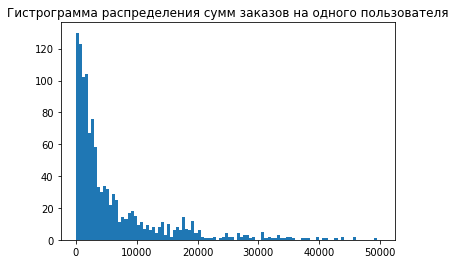

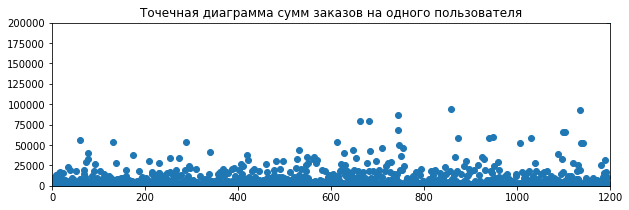

In [19]:
orders.head()
plt.hist(orders['revenue'], range=(0,50000), bins=100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')

x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,3))
plt.scatter(x_values, orders['revenue'])
plt.axis([0,1200, 0, 200000])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')

В основном стоимость заказов составляет 25-30 т.р, остальное можно считать выбросами, но окончательное решение расчитав перцентили, потому что принято отсеивать от 1% до 5% наблюдений с крайними значениями.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [20]:
print('95 -',round(np.percentile(orders['revenue'], 95)))
print('99 -',round(np.percentile(orders['revenue'], 99)))

95 - 28000
99 - 58233


Всего лишь 5% заказов дороже 28 т.р. Это и примем за границу определения аномальных заказов

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

Сформируем гипотезы:
* Нулевая: различий в конверсии между группами нет.
* Альтернативная: различия в конверсии между группами есть.

Критический уровень статистической значимости - 0,05

Применим тест Манна-Уитни

In [21]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userid', 'orders'].
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersB.columns = ['visitorid', 'orders']

#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print(f"P-value: {stats.mannwhitneyu(sampleA, sampleB)[1]:.2}")
print(f"Относительно изменение конверсии: {sampleB.mean() / sampleA.mean() - 1:.1%}")

P-value: 0.017
Относительно изменение конверсии: 13.8%


In [22]:
# КОД РЕВЬЮВЕРА
print(f"Относительно изменение конверсии: {sampleB.mean() / sampleA.mean() - 1:.1%}")


Относительно изменение конверсии: 13.8%


* Относительный прирост конверсии группы B по отношению к группе A: 13,8%
* P-value: 0.017
* P-value меньше 0.05, отвергаем нулевую гипотезу.

**Различия в конверсии между группами есть.**

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформируем гипотезы:
* Нулевая: различий в среднем чеке между группами нет.
* Альтернативная: различия в среднем чеке между группами есть.

In [23]:
print(f"P-value: {stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]:.3}")
print(f"Относительно изменение: {orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1:.1%}")

P-value: 0.729
Относительно изменение: 25.9%


* Относительный прирост среднего чека группы B по отношению к группе A: 25,9%
* P-value: 0,729
* P-value больше 0.05, не отвергаем нулевую гипотезу.

**Различий в среднем чеке между группами нет.**

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и пользователей с дорогими заказами.

In [24]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue']>28000]['visitorid']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print('Кол-во аномальных пользователей: {}'.format(abnormalUsers.shape))

Кол-во аномальных пользователей: (74,)


 Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [25]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [26]:
print(f"P-value: {stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]:.3}")
print(f"Относительно изменение: {sampleBFiltered.mean()/sampleAFiltered.mean()-1:.1%}")

P-value: 0.013
Относительно изменение: 17.3%


Результаты по конверсии почти не изменились

* Относительный прирост конверсии группы B по отношению к группе A: 17,3%
* P-value: 0.013
* P-value меньше 0.05, отвергаем нулевую гипотезу.

**Различия в конверсии между группами есть.**

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [27]:
print(f"P-value: {stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],)[1]:.3}")
print(f"Относительно изменение: {orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean()- 1:.1%}")

P-value: 0.738
Относительно изменение: -2.0%


* Относительный прирост среднего чека группы B по отношению к группе A: -2%. После удаления выбросов разница сократилась на 23,9%. 
* P-value: 0,738
* P-value больше 0.05, не отвергаем нулевую гипотезу.

**Различий в среднем чеке между группами нет.**

### Решение по результатам теста

* Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B, но были замечены подозрительные скачки связанные с выбросами. После удаления выбросов разница средних чеков в 2 группах стала минимальной.
* После очистки данных, показатель конверсии в группе B увеличился на 3,5%, с 13,8% до 17,3%.

**Разница показателей конверсии между группами до и после очистки статистически значима, что позволяет нам остановить тест и зафиксировать победу группы В**
